In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import re
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

In [3]:
# preprocess data
training_frame = pd.read_csv("Google_Stock_Price_Train.csv")
training_set = training_frame.iloc[:,1:5].values
for i in training_set:
    i[3] = re.sub(r',','',i[3])
    i[3] = float(i[3])
sc = MinMaxScaler()
training_set_scaled = sc.fit_transform(training_set)
X_train = []
y_train = []
timestamp = 60
dim = 4
for i in range(timestamp, len(training_set_scaled)):
    X_train.append(training_set_scaled[i-timestamp:i, 0:dim])
    y_train.append(training_set_scaled[i, 0])

X_train = np.array(X_train)
y_train = np.array(y_train)


X_train = X_train.reshape((len(training_set_scaled) - timestamp, timestamp, dim))


In [4]:
training_set_scaled

array([[0.08581368, 0.09640129, 0.09044931, 0.23757287],
       [0.09701243, 0.09834351, 0.09823458, 0.24151427],
       [0.09433366, 0.09251685, 0.09408623, 0.22878051],
       ...,
       [0.95725128, 0.95807422, 0.95844067, 0.40495845],
       [0.93796041, 0.94257381, 0.95033338, 0.40184391],
       [0.93688146, 0.93669113, 0.93421352, 0.38672602]])

In [5]:
print(X_train.shape)
print(y_train.shape)

(1198, 60, 4)
(1198,)


In [7]:
# create model
regressor = Sequential()
regressor.add(LSTM(units = 100, return_sequences = True, input_shape = (timestamp, dim)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 100))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))

In [9]:
regressor.compile(optimizer="adam", loss="mean_squared_error")

In [10]:
# train model
regressor.fit(X_train, y_train, batch_size=32,epochs=200)

W0920 17:12:38.953992 140506247505728 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0920 17:12:40.553073 140506247505728 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:1033: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/200
1198/1198 [==============================] - 6s 5ms/step - loss: 0.0260
Epoch 2/200
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 3/200
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0035
Epoch 4/200
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0028
Epoch 5/200
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0034
Epoch 6/200
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0036
Epoch 7/200
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0027
Epoch 8/200
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0024
Epoch 9/200
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0028
Epoch 10/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0029
Epoch 11/200
1198/1198 [==============================] - 5s 4ms/step - loss: 0.0027
Epoch 12/200
1198/1198 [==============================] - 5s 4ms/step - lo

1198/1198 [==============================] - 4s 4ms/step - loss: 0.0011
Epoch 98/200
1198/1198 [==============================] - 4s 3ms/step - loss: 7.3755e-04
Epoch 99/200
1198/1198 [==============================] - 4s 3ms/step - loss: 8.7176e-04
Epoch 100/200
1198/1198 [==============================] - 4s 4ms/step - loss: 9.1512e-04
Epoch 101/200
1198/1198 [==============================] - 4s 4ms/step - loss: 9.4762e-04
Epoch 102/200
1198/1198 [==============================] - 4s 4ms/step - loss: 8.4107e-04
Epoch 103/200
1198/1198 [==============================] - 4s 3ms/step - loss: 8.5719e-04
Epoch 104/200
1198/1198 [==============================] - 4s 4ms/step - loss: 8.1728e-04
Epoch 105/200
1198/1198 [==============================] - 4s 4ms/step - loss: 8.4841e-04
Epoch 106/200
1198/1198 [==============================] - 4s 3ms/step - loss: 8.3109e-04
Epoch 107/200
1198/1198 [==============================] - 4s 4ms/step - loss: 8.0653e-04
Epoch 108/200
1198/1198 [=====

1198/1198 [==============================] - 4s 4ms/step - loss: 6.3902e-04
Epoch 189/200
1198/1198 [==============================] - 4s 4ms/step - loss: 5.2007e-04
Epoch 190/200
1198/1198 [==============================] - 4s 3ms/step - loss: 6.5062e-04
Epoch 191/200
1198/1198 [==============================] - 4s 3ms/step - loss: 7.2045e-04
Epoch 192/200
1198/1198 [==============================] - 4s 4ms/step - loss: 6.6986e-04
Epoch 193/200
1198/1198 [==============================] - 4s 3ms/step - loss: 5.7830e-04
Epoch 194/200
1198/1198 [==============================] - 4s 4ms/step - loss: 5.6206e-04
Epoch 195/200
1198/1198 [==============================] - 4s 3ms/step - loss: 6.6509e-04
Epoch 196/200
1198/1198 [==============================] - 4s 3ms/step - loss: 5.7196e-04
Epoch 197/200
1198/1198 [==============================] - 4s 4ms/step - loss: 6.1041e-04
Epoch 198/200
1198/1198 [==============================] - 4s 4ms/step - loss: 5.2161e-04
Epoch 199/200
1198/1198 

In [57]:
# test model
test_frame = pd.read_csv("Google_Stock_Price_Test.csv")
test_set = test_frame.iloc[:,1:5].values

for i in test_set:
    i[3] = re.sub(r',','',str(i[3]))
    i[3] = float(i[3])
    
y_test = test_set[:,0]

test_set_scaled = sc.transform(test_set)
test_set_scaled = np.concatenate((training_set_scaled[len(training_set_scaled) - timestamp:], test_set_scaled)) 
test_set_scaled = test_set_scaled[len(test_set_scaled) - (20 + timestamp):,:]
X_test = []

for i in range(timestamp, len(test_set_scaled)):
    X_test.append(test_set_scaled[i-timestamp:i, 0:dim])

X_test = np.array(X_test)

X_test = X_test.reshape((len(test_set_scaled) - timestamp, timestamp, dim))


In [58]:
y_test

array([778.81, 788.36, 786.08, 795.26, 806.4 , 807.86, 805.  , 807.14,
       807.48, 807.08, 805.81, 805.12, 806.91, 807.25, 822.3 , 829.62,
       837.81, 834.71, 814.66, 796.86])

In [59]:
# make the prediction
predict = regressor.predict(X_test)

In [60]:
# inverse the transform
real_predict = np.zeros((len(predict), dim))
real_predict[:,0] = predict[:,0]

real_predict = sc.inverse_transform(real_predict)
real_y = y_test

In [62]:
# plot the prediction
import matplotlib.pyplot as plt


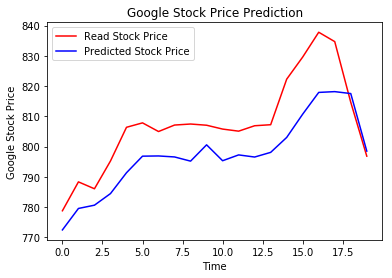

In [64]:
plt.plot(real_y, color="red", label="Read Stock Price")
plt.plot(real_predict[:,0], color="blue", label="Predicted Stock Price")
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()